# Import libraries and data set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('movie_reviews.csv')
df

,text,label
0,If you havent seen this movie than you need to...,1
1,but Cinderella gets my vote not only for the w...,0
2,This movie is pretty cheesy but I do give it c...,1
3,I have not seen a Van Damme flick for a while ...,1
4,This is a sleeper It defines Nicholas Cage The...,1
...,...,...
39995,This movie is inspiring to anyone who is or ha...,1
39996,This film hits the heart with a reality like n...,1
39997,East Side Story is a documentary of musical co...,1
39998,And a selfadmitted one to boot At one point th...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


# Preprocessing

In [5]:
df.drop_duplicates()

,text,label
0,If you havent seen this movie than you need to...,1
1,but Cinderella gets my vote not only for the w...,0
2,This movie is pretty cheesy but I do give it c...,1
3,I have not seen a Van Damme flick for a while ...,1
4,This is a sleeper It defines Nicholas Cage The...,1
...,...,...
39995,This movie is inspiring to anyone who is or ha...,1
39996,This film hits the heart with a reality like n...,1
39997,East Side Story is a documentary of musical co...,1
39998,And a selfadmitted one to boot At one point th...,0


<Axes: xlabel='label'>

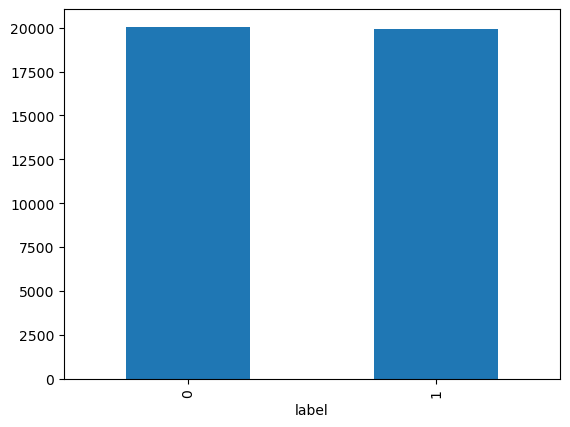

In [6]:
df['label'].value_counts().plot(kind = 'bar')

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 

train, test = train_test_split(df, test_size = 0.2)

In [8]:
vectorizer = CountVectorizer(stop_words='english', )

X_train = vectorizer.fit_transform(train['text'])
y_train = train['label']

X_test = vectorizer.transform(test['text'])
y_test = test['label']

In [9]:
X_train.shape


(32000, 129697)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

MultiNBclf = MultinomialNB() 
MultiNBclf.fit(X_train, y_train) 
MultiNBacc = accuracy_score(MultiNBclf.predict(X_test), y_test)

print('Accuracy of Multinomial Naive Bayes = {}'.format(MultiNBacc * 100))

Accuracy of Multinomial Naive Bayes = 85.5625


In [11]:
BerNBclf = BernoulliNB()
BerNBclf.fit(X_train, y_train)
BerNBacc = accuracy_score(BerNBclf.predict(X_test), y_test)

print('Accuracy of Bernoulli Naive Bayes = {}'.format(BerNBacc * 100))

Accuracy of Bernoulli Naive Bayes = 85.075


In [12]:
from sklearn import tree

DTclf = tree.DecisionTreeClassifier()
DTclf.fit(X_train, y_train)
DTacc = accuracy_score(DTclf.predict(X_test), y_test)

print('Accuracy of Decision Tree = {}'.format(DTacc * 100))

Accuracy of Decision Tree = 73.0125


In [13]:
from sklearn import svm
SVMclf = svm.SVC()
SVMclf.fit(X_train, y_train)
SVMacc = accuracy_score(SVMclf.predict(X_test), y_test)
print('Accuracy of SVM = {}'.format(SVMacc * 100))

Accuracy of SVM = 87.6625


In [14]:
X = vectorizer.fit_transform(df['text'])
y = df['label']

df_predict = pd.read_csv('test_data.csv')
predict = vectorizer.transform(df_predict['text'])

SVMclf.fit(X, y) 
predictions = SVMclf.predict(predict)

df_predict['Category'] = predictions
result = df_predict[['Id', 'Category']]

In [16]:
result['Text'] = df['text']

In [17]:
result

,Id,Category,Text
0,0,0,If you havent seen this movie than you need to...
1,1,1,but Cinderella gets my vote not only for the w...
2,2,0,This movie is pretty cheesy but I do give it c...
3,3,1,I have not seen a Van Damme flick for a while ...
4,4,1,This is a sleeper It defines Nicholas Cage The...
...,...,...,...
9995,9995,1,Watching this was like getting a large mackere...
9996,9996,0,Especially after watching THE MATRIX RELOADED ...
9997,9997,1,I rented this movie because it falls under the...
9998,9998,1,This is an excellent example of an entreatingl...
